In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

MovieMetadata_df = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header=None)

CharacterMetadata_df = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t', header=None)

# Define column headers as a list
MovieMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages (Freebase ID:name tuples)',
    'Movie countries (Freebase ID:name tuples)',
    'Movie genres (Freebase ID:name tuples)'
]

MovieMetadata_df.columns = MovieMetadata_df_headers

# Define column headers for the second dataset
CharacterMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]

CharacterMetadata_df.columns = CharacterMetadata_df_headers

# Text data 
names_df = pd.read_csv('MovieSummaries/name.clusters.txt', sep="\t", header=None)
plot_summaries_df = pd.read_csv('MovieSummaries/plot_summaries.txt', sep="\t", header=None)
tvTropes_df = pd.read_csv('MovieSummaries/tvtropes.clusters.txt', sep="\t", header=None)

names_df_headers = [
    'Character Names',
    'Instances'
]

names_df.columns = names_df_headers

tvTropes_df_headers = [
    'Character Types',
    'Instances'
]

tvTropes_df.columns = tvTropes_df_headers

plot_summaries_df_headers = [
    'Wikipedia movie ID',
    'Summaries'
]

plot_summaries_df.columns = plot_summaries_df_headers

import ast
MovieMetadata_df['Country dictionnaire'] = MovieMetadata_df['Movie countries (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Genre dictionnaire'] = MovieMetadata_df['Movie genres (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Language dictionnaire'] = MovieMetadata_df['Movie languages (Freebase ID:name tuples)'].apply(ast.literal_eval)


In [3]:
print(tvTropes_df.head(5))
print(names_df.head(5))

           Character Types                                          Instances
0  absent_minded_professor  {"char": "Professor Philip Brainard", "movie":...
1  absent_minded_professor  {"char": "Professor Keenbean", "movie": "Richi...
2  absent_minded_professor  {"char": "Dr. Reinhardt Lane", "movie": "The S...
3  absent_minded_professor  {"char": "Dr. Harold Medford", "movie": "Them!...
4  absent_minded_professor  {"char": "Daniel Jackson", "movie": "Stargate"...
  Character Names  Instances
0   Stuart Little  /m/0k3w9c
1   Stuart Little  /m/0k3wcx
2   Stuart Little  /m/0k3wbn
3        John Doe  /m/0jyg35
4        John Doe  /m/0k2_zn


### Nombre de films par pays:

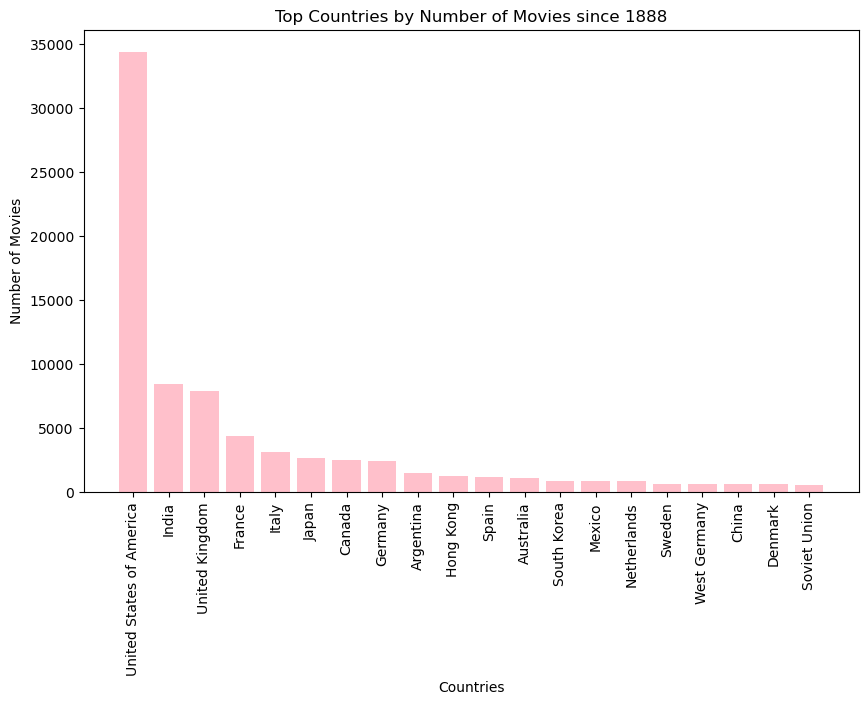

In [17]:
countries_counts = Counter()

for country_dict in MovieMetadata_df['Country dictionnaire']:
    countries_counts.update(country_dict.values())

countries_counts = sorted(countries_counts.items(), key=lambda x: x[1], reverse= True)

#print("Nombre de films par pays:")
#display(countries_counts)

countries, counts = zip(*countries_counts)

top_n = 20
countries = countries[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color='pink')
plt.xlabel("Countries")
plt.ylabel("Number of Movies")
plt.title("Top Countries by Number of Movies since 1888")
plt.xticks(rotation=90)  
plt.show()


### Nombre de films par genre: 

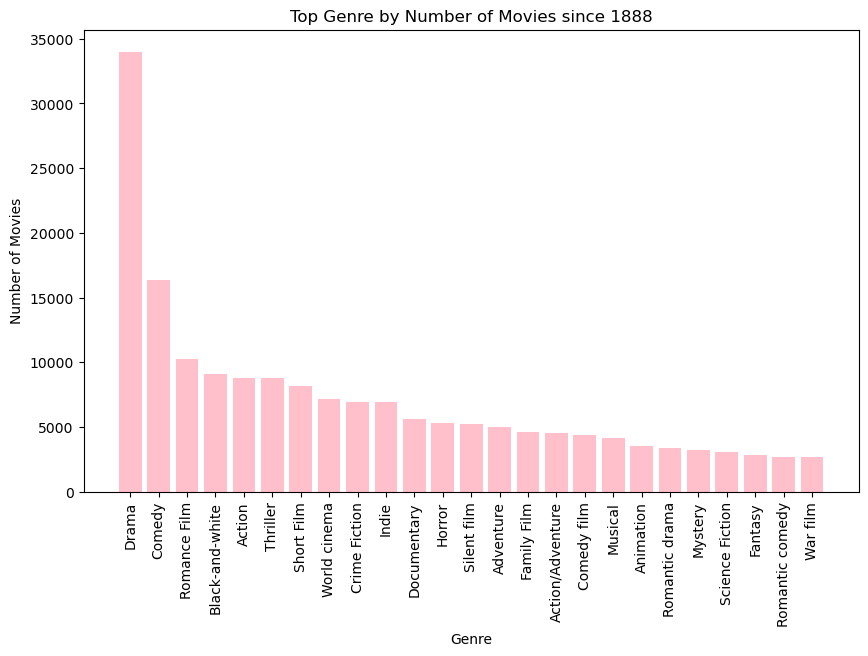

In [24]:
genre_counts = Counter()

for genre_dict in MovieMetadata_df['Genre dictionnaire']:
    genre_counts.update(genre_dict.values())

genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse= True)

#print("Nombre de films par pays:")
#display(genre_counts)

genres, counts = zip(*genre_counts)

top_n = 25
genres = genres[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color='pink')
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top Genre by Number of Movies since 1888")
plt.xticks(rotation=90)  
plt.show()

In [6]:
# Function to extract the year
def extract_year(date_str):
    if pd.isna(date_str):  # Check if the value is NaN
        return None  # Return None or a suitable placeholder for NaN
    if len(date_str) == 4:  # Check if it's a four-digit year
        return int(date_str)  # Return the year as an integer
    return pd.to_datetime(date_str, errors='coerce').year  # Convert to datetime and extract year


# Extract the year without modifying the original column
MovieMetadata_df['Year'] = MovieMetadata_df['Movie release date'].apply(extract_year)
MovieMetadata_df['Year'] = MovieMetadata_df['Year'].apply(lambda x: int(x) if pd.notna(x) else x)


### Jointure MovieMetadata/ summaries 

In [7]:
print(plot_summaries_df.shape)

#Jointure tableau principal des films/summaries 
MovieMetadata_df_1 = pd.merge(MovieMetadata_df, plot_summaries_df, on = "Wikipedia movie ID", how="inner")

print(MovieMetadata_df_1.shape)

(42303, 2)
(42204, 14)


### Sélection des films sur l'espace: A améliorer, comment créer un modèle qui détermine si un film parle d'espace ou non ? 

In [8]:
substrings = ['Space', 'space', 'astronaut', 'Moon', 'moon', 'rocket', 'NASA', 'galaxy', 'planets', 'Apollo', 'black hole', 'gravity', 
              'alien', 'Race Space', 'Spoutnik', 'spaceship', 'light year']

pattern = '|'.join(substrings)

space_movies = MovieMetadata_df_1[MovieMetadata_df_1['Summaries'].str.contains(pattern, case=False, na=False)]

print(space_movies.shape)


(3094, 14)


### Nombre de films sur l'espace par année 

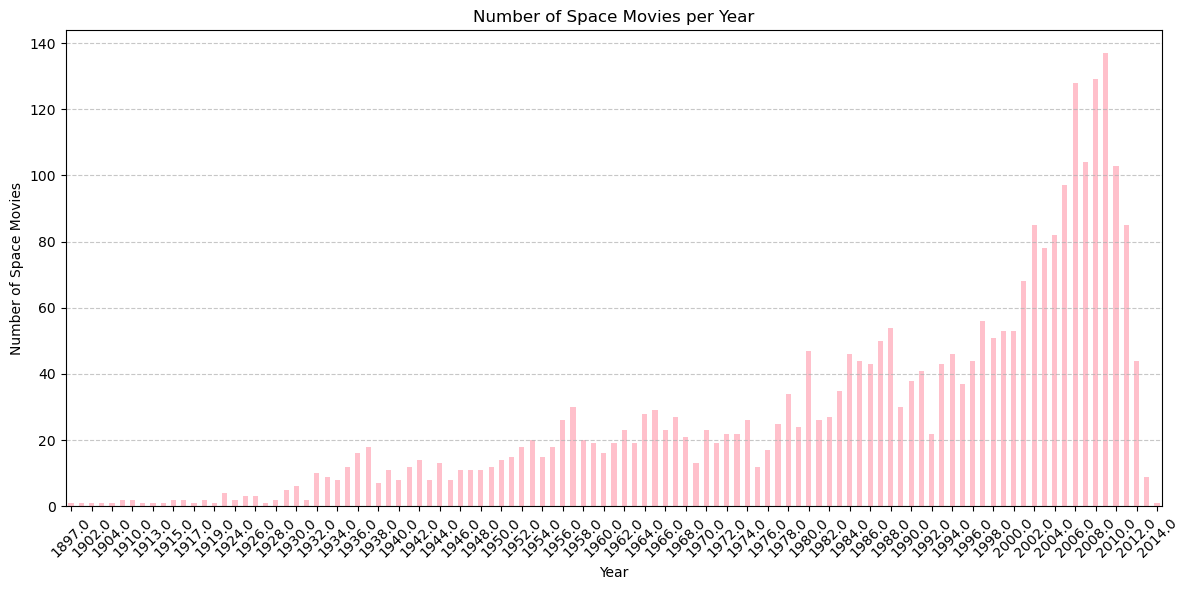

In [10]:
space_movies_per_year =space_movies['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Number of Space Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Space Movies')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Course à l'espace: 1957-1975

Pic en 1957 --> Spoutnik 1, premier satellite artificiel placé en orbite par l'URSS 

le nombre de films sur l'espace augmente à partir des années 1950. 
Explosion du nombre de films sur l'espace au début des années 2000 avec le développement des effets spéciaux. 


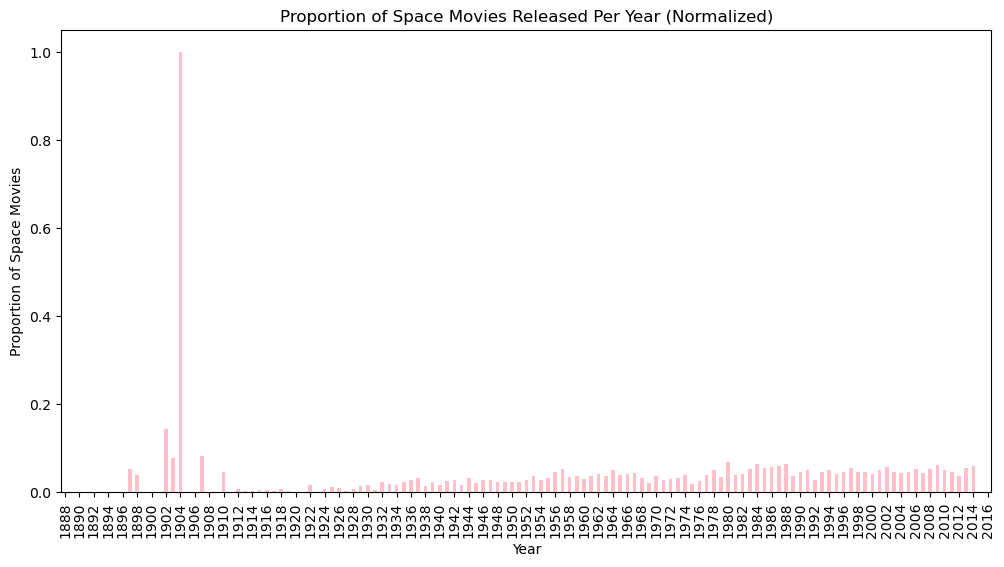

In [35]:
movies_per_year = MovieMetadata_df['Year'].value_counts().sort_index() #number of movies per year

all_years = pd.RangeIndex(start=min(movies_per_year.index.min(), space_movies_per_year.index.min()), 
                          stop=max(movies_per_year.index.max(), space_movies_per_year.index.max()) + 1)

movies_per_year = movies_per_year.reindex(all_years, fill_value=0)
space_movies_per_year = space_movies_per_year.reindex(all_years, fill_value=0)

proportion_space_movies_per_year = (space_movies_per_year / movies_per_year).fillna(0)

plt.figure(figsize=(12, 6))
proportion_space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Proportion of Space Movies Released Per Year (Normalized)')
plt.xlabel('Year')
plt.ylabel('Proportion of Space Movies')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=90)
plt.show()

### Number of space-related movies per country: 

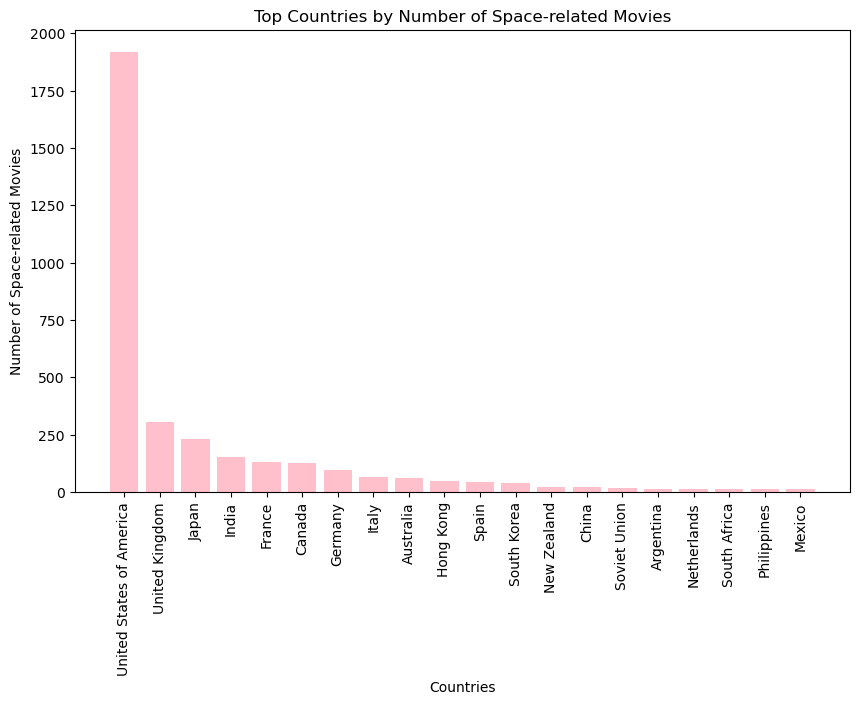

In [25]:
countries_counts_space = Counter()

for country_dict in space_movies['Country dictionnaire']:
    countries_counts_space.update(country_dict.values())

countries_counts_space = sorted(countries_counts_space.items(), key=lambda x: x[1], reverse= True)


#print("Nombre de films par pays:")
#display(countries_counts_space)

countries, counts = zip(*countries_counts_space)

top_n = 20
countries = countries[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color='pink')
plt.xlabel("Countries")
plt.ylabel("Number of Space-related Movies")
plt.title("Top Countries by Number of Space-related Movies")
plt.xticks(rotation=90)  # Tourner les noms des pays pour une meilleure lisibilité
plt.show()

### Genre of space movies: 

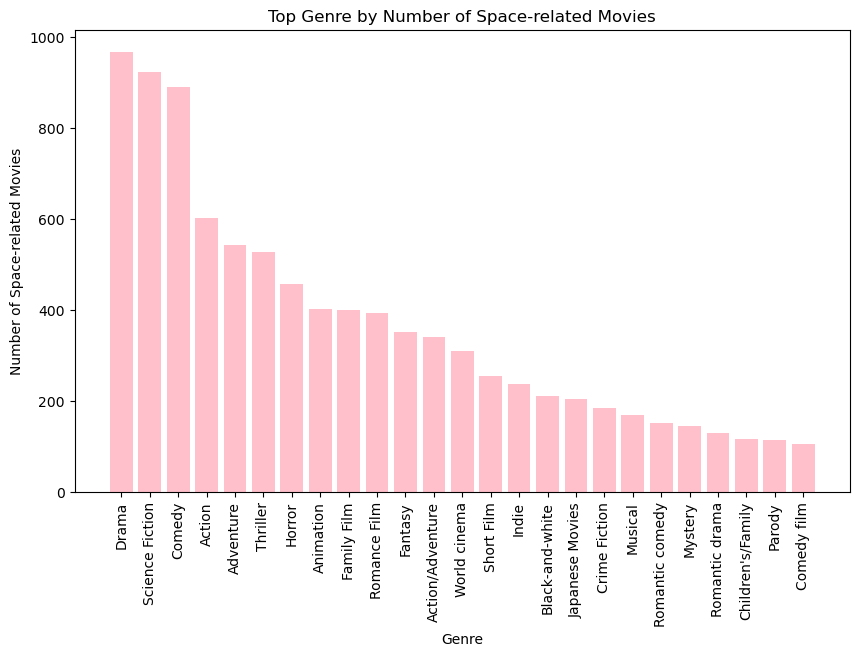

In [27]:
genre_counts_space = Counter()

for genre_dict in space_movies['Genre dictionnaire']:
    genre_counts_space.update(genre_dict.values())

genre_counts_space = sorted(genre_counts_space.items(), key=lambda x: x[1], reverse= True)
#display(genre_counts_space)

genre, counts = zip(*genre_counts_space)

top_n = 25
genre = genre[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(genre, counts, color='pink')
plt.xlabel("Genre")
plt.ylabel("Number of Space-related Movies")
plt.title("Top Genre by Number of Space-related Movies")
plt.xticks(rotation=90)  # Tourner les noms des pays pour une meilleure lisibilité
plt.show()

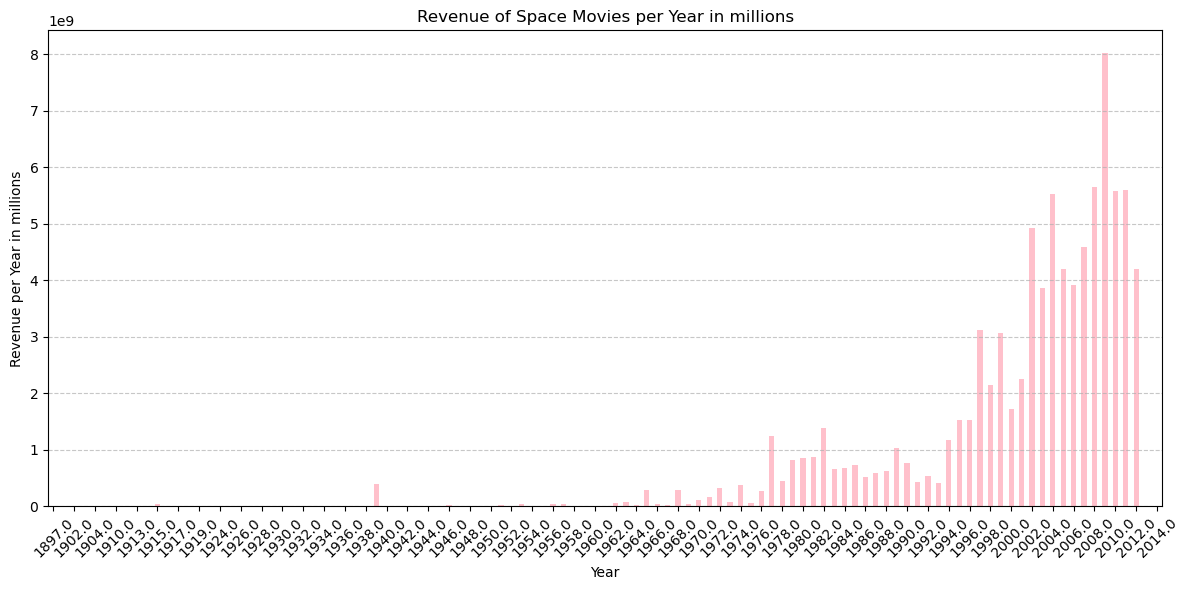

In [15]:
space_revenue_per_year = space_movies.groupby('Year')['Movie box office revenue'].sum()

plt.figure(figsize=(12, 6))
space_revenue_per_year.plot(kind='bar', color='pink')
plt.title('Revenue of Space Movies per Year in millions')
plt.xlabel('Year')
plt.ylabel('Revenue per Year in millions')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

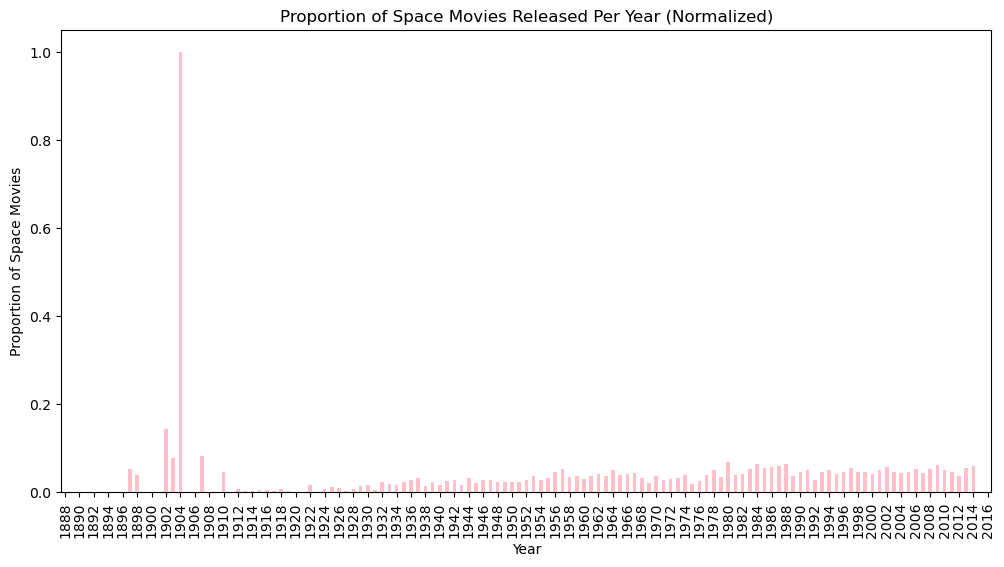

In [36]:
revenue_per_year = MovieMetadata_df.groupby('Year')['Movie box office revenue'].sum()

all_years = pd.RangeIndex(start=min(movies_per_year.index.min(), space_movies_per_year.index.min()), 
                          stop=max(movies_per_year.index.max(), space_movies_per_year.index.max()) + 1)

revenue_per_year = revenue_per_year.reindex(all_years, fill_value=0)
space_revenue_per_year= space_revenue_per_year.reindex(all_years, fill_value=0)

proportion_revenue_space_movies_per_year = (space_movies_per_year / movies_per_year).fillna(0)

plt.figure(figsize=(12, 6))
proportion_revenue_space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Proportion of Space Movies revenue  Per Year (Normalized)')
plt.xlabel('Year')
plt.ylabel('Proportion of Space Movies revenue')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=90)
plt.show()